In [1]:
import pandas as pd
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from chessnet.graphs import get_players_degree
from chessnet.auxiliary import linear_regression, powerlaw
from chessnet.statistics import get_players_elo
from chessnet.utils import FIGS_DIR, ARTIFACTS_DIR
from chessnet.mpl_settings_v3 import *

In [12]:
node_dfs = {
    "OTB": get_players_degree("OM_OTB_201609").join(get_players_elo("OM_OTB_201609"), how="inner"),
    "Portal": get_players_degree("OM_Portal_201510").join(get_players_elo("OM_Portal_201510"), how="inner"),
}

In [13]:
def get_elo_vs_k(node_df):
    X = np.logspace(1, np.log10(max(node_df.k)+1), 20).astype(int)
    mean_values = []
    std_values = []
    for i in range(len(X)-1):
        mink, maxk = X[i], X[i+1]
        elos = node_df[(mink <= node_df.k) & (node_df.k < maxk)].MeanElo
        mean_values.append(elos.mean())
        std_values.append(elos.std())
    return X, mean_values, std_values

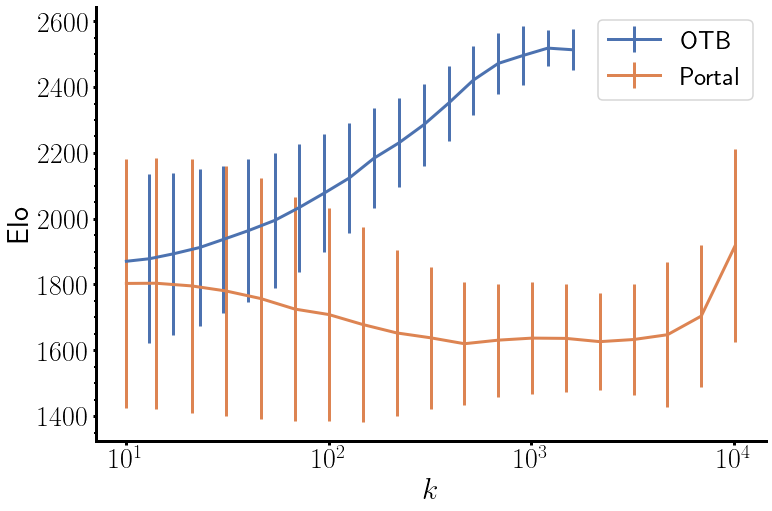

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$k$")
ax.set_ylabel("Elo")
ax.set_xscale("log")
for name, node_df in node_dfs.items():
    X, mean_values, std_values = get_elo_vs_k(node_df)
    ax.errorbar(X[:-1], mean_values, std_values, label=name)
ax.legend()
sns.despine()
plt.show()